# Mount Drive

In [0]:
#Import drive
from google.colab import drive
#Mount Google Drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.chdir('drive/My Drive/Work/Thesis_Julien_Dejasmin/Work/code/Binary_activations_V2/MNIST_Binary_V2')

In [0]:
!ls

config.py   distributions  README.md	     trained_models
data	    experiments    requirements.txt  utils
DataLoader  __pycache__    results	     visualize


# Import:

In [0]:
import torch.optim as optim
from torch import load
import torch
# from torchsummary import summary

from DataLoader.dataLoaders import get_omniglot_dataloaders_v1
from utils.models import NoBinaryNetOmniglotClassification, BinaryNetOmniglotClassification
from utils.training import training, test, gpu_config

import collections
import torch.nn as nn
from functools import partial
import numpy as np
import matplotlib.pyplot as plt

# for visualization
import torchvision
import torchvision.transforms as transforms
import torchvision.transforms.functional as F
from torchvision import datasets, transforms
from PIL import Image
from visualize.viz import show_som_examples, visTensor

# Parameters:

In [0]:
# parameters default values
lr = 1e-3
# momentum = 0.9
nb_epoch = 1
batch_size_train = 1
batch_size_test = 1

# Dataset:

In [0]:
# Omniglto Dataset
train_loader, test_loader = get_omniglot_dataloaders_v1(batch_size_train, batch_size_test)

Files already downloaded and verified
Number of training examples: 17352
Number of testing examples: 1928


# Model:

In [0]:
# Model, activation type, estimator type
def get_my_model_Omniglto(binary, stochastic, reinforce, first_conv_layer, second_conv_layer, 
                 third_conv_layer, fourth_conv_layer):

    if binary:
        if stochastic:
            mode = 'Stochastic'
            names_model = 'Omniglot_classif_Stochastic'
        else:
            mode = 'Deterministic'
            names_model = 'Omniglot_classif_Deterministic'
        if reinforce:
            estimator = 'REINFORCE'
            names_model += '_REINFORCE'
        else:
            estimator = 'ST'
            names_model += '_ST'
        if first_conv_layer:
            names_model += '_first_conv_binary'
        if second_conv_layer:
            names_model += '_second_conv_binary'
        if third_conv_layer:
            names_model += '_third_conv_binary'
        if fourth_conv_layer:
            names_model += '_fourth_conv_binary'
        model = BinaryNetOmniglotClassification(first_conv_layer=first_conv_layer, second_conv_layer=second_conv_layer,
                                        third_conv_layer=third_conv_layer, fourth_conv_layer=fourth_conv_layer,
                                        mode=mode, estimator=estimator)
    else:
        model = NoBinaryNetOmniglotClassification()
        names_model = 'Omniglot_classif_NonBinaryNet'
        mode = None
        estimator = None
 
    # gpu config:
    model, use_gpu = gpu_config(model)
    return model, names_model, use_gpu

def no_binary_model():
  # Parameters
  slope_annealing = False
  reinforce = False
  stochastic = False
  binary = False
  plot_result = True
  first_conv_layer = False
  second_conv_layer = False
  third_conv_layer = False
  fourth_conv_layer = False
  omniglot = True

  model, name_model, use_gpu = get_my_model(binary, stochastic, reinforce, first_conv_layer, 
                                  second_conv_layer, third_conv_layer, fourth_conv_layer)

  return model, name_model

def binary_model_first():
  # Parameters
  slope_annealing = False
  reinforce = False
  stochastic = True
  binary = True
  plot_result = True
  first_conv_layer = True
  second_conv_layer = False
  third_conv_layer = False
  fourth_conv_layer = False
  omniglot = True

  model, name_model, use_gpu = get_my_model(binary, stochastic, reinforce, first_conv_layer, 
                                  second_conv_layer, third_conv_layer, fourth_conv_layer)
  return model, name_model

def binary_model_second():
  # Parameters
  slope_annealing = False
  reinforce = False
  stochastic = True
  binary = True
  plot_result = True
  first_conv_layer = False
  second_conv_layer = True
  third_conv_layer = False
  fourth_conv_layer = False
  omniglot = True

  model, name_model, use_gpu = get_my_model(binary, stochastic, reinforce, first_conv_layer, 
                                  second_conv_layer, third_conv_layer, fourth_conv_layer)
  return model, name_model

def binary_model_third():
  # Parameters
  slope_annealing = False
  reinforce = False
  stochastic = True
  binary = True
  plot_result = True
  first_conv_layer = False
  second_conv_layer = False
  third_conv_layer = True
  fourth_conv_layer = False
  omniglot = True

  model, name_model, use_gpu = get_my_model(binary, stochastic, reinforce, first_conv_layer, 
                                  second_conv_layer, third_conv_layer, fourth_conv_layer)
  return model, name_model

def binary_model_fourth():
  # Parameters
  slope_annealing = False
  reinforce = False
  stochastic = True
  binary = True
  plot_result = True
  first_conv_layer = False
  second_conv_layer = False
  third_conv_layer = False
  fourth_conv_layer = True
  omniglot = True

  model, name_model, use_gpu = get_my_model(binary, stochastic, reinforce, first_conv_layer, 
                                  second_conv_layer, third_conv_layer, fourth_conv_layer)
  return model, name_model

# Training:

## Omniglot classification Network no binary:

In [0]:
model, name_model = no_binary_model()
print(name_model)

In [0]:
print(model)

### Training:

In [0]:
# optimizer
optimizer = optim.Adam(model.parameters(), lr=lr)

train_loss, train_acc, val_loss, val_acc = training(use_gpu, model, name_model, nb_epoch, train_loader, test_loader,
                                                    optimizer, plot_result, slope_annealing)

### Test:

In [0]:
# test
model.load_state_dict(load('trained_models/Omniglot_classif/' + name_model + '.pt', map_location=torch.device('cpu')))
test_loss, test_acc = test(use_gpu, model, test_loader)

/content/drive/My Drive/Work/Thesis_Julien_Dejasmin/Work/code/Binary_activations_V2/MNIST_Binary_V2/utils/training.py:133: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Test set: Average loss: 0.1696, Accuracy: 1860/1928 (96%)



## Omniglot classification Network with binary first conv layer:

In [0]:
model, name_model = binary_model_first()
print(name_model)

no gpu available !
Omniglot_classif_Stochastic_ST_first_conv_binary


### Training:

In [0]:
# optimizer
optimizer = optim.Adam(model.parameters(), lr=lr)
train_loss, train_acc, val_loss, val_acc = training(use_gpu, model, name_model, nb_epoch, train_loader, test_loader,
                                                    optimizer, plot_result, slope_annealing)

### Test:

In [0]:
# test
model.load_state_dict(load('trained_models/Omniglot_classif/' + name_model + '.pt', map_location=torch.device('cpu')))
test_loss, test_acc = test(use_gpu, model, test_loader)

/content/drive/My Drive/Work/Thesis_Julien_Dejasmin/Work/code/Binary_activations_V2/MNIST_Binary_V2/utils/training.py:133: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Test set: Average loss: 0.3937, Accuracy: 1855/1928 (96%)



## Omniglot classification Network with binary second conv layer:

In [0]:
model, name_model = binary_model_second()
print(name_model)

no gpu available !
Omniglot_classif_Stochastic_ST_second_conv_binary


### Training:

In [0]:
# optimizer
optimizer = optim.Adam(model.parameters(), lr=lr)

train_loss, train_acc, val_loss, val_acc = training(use_gpu, model, name_model, nb_epoch, train_loader, test_loader,
                                                    optimizer, plot_result, slope_annealing)

### Test:

In [0]:
# test
model.load_state_dict(load('trained_models/Omniglot_classif/' + name_model + '.pt', map_location=torch.device('cpu')))
test_loss, test_acc = test(use_gpu, model, test_loader)

/content/drive/My Drive/Work/Thesis_Julien_Dejasmin/Work/code/Binary_activations_V2/MNIST_Binary_V2/utils/training.py:133: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Test set: Average loss: 5.1414, Accuracy: 376/1928 (20%)



## Omniglot classification Network with binary third conv layer:

In [0]:
model, name_model = binary_model_third()
print(name_model)

no gpu available !
Omniglot_classif_Stochastic_ST_third_conv_binary


### Training:

In [0]:
# optimizer
optimizer = optim.Adam(model.parameters(), lr=lr)

train_loss, train_acc, val_loss, val_acc = training(use_gpu, model, name_model, nb_epoch, train_loader, test_loader,
                                                    optimizer, plot_result, slope_annealing)

### Test:

In [0]:
# test
model.load_state_dict(load('trained_models/Omniglot_classif/' + name_model + '.pt', map_location=torch.device('cpu')))
test_loss, test_acc = test(use_gpu, model, test_loader)

/content/drive/My Drive/Work/Thesis_Julien_Dejasmin/Work/code/Binary_activations_V2/MNIST_Binary_V2/utils/training.py:133: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Test set: Average loss: 5.5008, Accuracy: 302/1928 (16%)



## Omniglot classification Network with binary fourth conv layer:

In [0]:
model, name_model = binary_model_fourth()
print(name_model)

no gpu available !
Omniglot_classif_Stochastic_ST_fourth_conv_binary


### Training:

In [0]:
# optimizer
optimizer = optim.Adam(model.parameters(), lr=lr)

train_loss, train_acc, val_loss, val_acc = training(use_gpu, model, name_model, nb_epoch, train_loader, test_loader,
                                                    optimizer, plot_result, slope_annealing)

### Test:

In [0]:
# test
model.load_state_dict(load('trained_models/Omniglot_classif/' + name_model + '.pt', map_location=torch.device('cpu')))
test_loss, test_acc = test(use_gpu, model, test_loader)

/content/drive/My Drive/Work/Thesis_Julien_Dejasmin/Work/code/Binary_activations_V2/MNIST_Binary_V2/utils/training.py:133: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Test set: Average loss: 5.7963, Accuracy: 309/1928 (16%)



# Visualization:

## Visuazation regions that maximizes a specific layer and filter:

### New method modules:

In [0]:
def get_all_values_fm_of_model_for_all_dataset(model, train_loader, activations):

    for name, m in model.named_modules():
      if type(m)==nn.Conv2d:
        # partial to assign the layer name to each hook
        m.register_forward_hook(partial(save_activation, name))
        break
    
    # forward pass through the full dataset
    for batch in train_loader:
      out = model(batch[0])

    # concatenate all the outputs we saved to get the the activations for each layer for the whole dataset
    activations = {name: torch.cat(outputs, 0) for name, outputs in activations.items()}

    # just print out the sizes of the saved activations as a sanity check
    for k,v in activations.items():
      print (k, v.size())

    # return values in np array
    layer = []
    for i in ragen(len(activations)):
      layer.append(activations['layer1'].detach().numpy())

    return layer


def save_activation(name, mod, inp, out):
	activations[name].append(out.cpu())

In [0]:
def get_index_x_y_max_activation_fm(feature_map):
    """
    return a index x,y values list for the high left pixel of the region interest
    """
    ind_x = []
    ind_y = []
    act_value = []

    for j in range(feature_map.shape[0]):
      local_ind_x = []
      local_ind_y = []
      act_local = []
      for i in range(feature_map.shape[1]):

        act = max(feature_map[j][i].min(), feature_map[j][i].max(), key=abs)
        act_local.append(act)
        # index x, y of max activation in conv layer 2
        local_ind_x.append(int((np.where(feature_map[j][i]==act)[0])[0]))
        local_ind_y.append(int((np.where(feature_map[j][i]==act)[1])[0]))
      act_value.append(np.asarray(act_local))
      ind_x.append(np.asarray(local_ind_x))
      ind_y.append(np.asarray(local_ind_y))
    return ind_x, ind_y, act_value


def get_regions_max(ind_x, ind_y, stride, padding, len_img_h, len_img_w, filter_size, image, nb_fm):
  """
  return region of interest from index x,y
  """
  regions = []
  for i, im in enumerate(image):
    if i == 3001:
      break
    # for each image
    print('treating image n {}/{}'.format(i, len(image)))
    image = im[0][0][0]
    local_regions = []

    for j in range(nb_fm):
      # for each fm
      ind_x_im = ind_x[i][j]
      ind_y_im = ind_y[i][j]

      # determine pixel high left of region of interest:
      index_col_hl = (ind_x_im * stride) - filter_size//2
      index_raw_hl = (ind_y_im * stride) - filter_size//2
      
      if index_col_hl < 0:
        index_col_hl = 0
        reduice_region_col_size = index_col_hl
      else:
        reduice_region_col_size = 0
      if index_raw_hl < 0:
        index_raw_hl = 0
        reduice_region_raw_size = index_raw_hl
      else:
        reduice_region_raw_size = 0

      begin_col = index_col_hl
      end_col = index_col_hl + filter_size + reduice_region_col_size
      begin_raw = index_raw_hl
      end_raw = index_raw_hl + filter_size + reduice_region_raw_size

      if end_col > len_img_w:
        end_col = len_img_w
      if end_raw > len_img_h:
        end_raw = len_img_h

      local_regions.append(image[begin_raw:end_raw, begin_col:end_col].detach().numpy())
    regions.append(local_regions)
  return regions

### Modules for extract only region of interest:

In [0]:
def get_regions_interest(regions, activation, best, worst, viz_mean_img, viz_grid, percentage=None, list_filter = None):
  """
  get regions of interest
  """
  nb_filter = activation.shape[1]

  if best==False and worst==False:
    assert percentage!=None, "if don't choice best or worst value, you didn't choice a percentage value"
  if best==True and worst==True:
    raise TypeError('choice only one value at True between best an worst')

  # consider only regions of all image of list_filter or all filter
  if list_filter == None:
    print('Interest of all filters')
    regions_interest_filter = regions
    activations_values_interest = activation
    nb_filter = nb_filter
  else:
    assert max(list_filter) < nb_filter and min(list_filter) >= 0, 'filter choisen out of range'
    print('Interest of filters:', list_filter)
    regions_interest_filter = get_index_filter_interest(regions, list_filter)
    activations_values_interest = activation[:, list_filter]
    nb_filter = len(list_filter)

  # consider a percent of best or worst activations:
  if percentage == None:
    print('Consider all image regions')
    selected_regions = regions_interest_filter
  else:
    assert percentage <= 100 and percentage >= 0, 'percentage value must be in 0 and 100'
    n = int((len(activation)*percentage)/100)
    print('Consider {}% image regions = {} images'.format(percentage, n))
    selected_regions = get_n_first_regions_index(best, worst, n, activations_values_interest, nb_filter, regions_interest_filter)

  # visualization: one mean image or grid image:
  if viz_mean_img:
      nb_image = 1
      print('mean image:')
      for i, ind_filter in enumerate(list_filter):
        print('mean regions of {} regions more={} or worst={} active for filter number: {} :'.format(n, best, worst, ind_filter))
        mean_img = np.mean(selected_regions[i])
        viz_regions(nb_image, mean_img)

  if viz_grid:
      nb_image = n
      print('grid image')
      for i, ind_filter in enumerate(list_filter):
        reg = []
        print('grid regions of {} regions more={} or worst={} active for filter number: {} :'.format(n, best, worst, ind_filter))
        for j in range(len(selected_regions[i])):
          reg.append(selected_regions[i][j])
        viz_regions(nb_image, np.asarray(reg))

  return selected_regions


def viz_regions(nb_image, regions):
  """
  visualize region of interest
  """
  regions = torch.tensor(regions) 
  regions = regions.reshape((nb_image,1,regions.shape[-2],regions.shape[-1]))
  visTensor(regions, ch=0, allkernels=False)
  plt.ioff()
  plt.show()


def get_n_first_regions_index(best, worst, n, activation, nb_filter, regions):
  """
  select only regions that we want 
  """
  regions_selected = []
  if best:
    for i in range(nb_filter):
      ind_filter = (-activation[:, i]).argsort()[:n]
      regions_selected.append(regions[ind_filter, i])
    return regions_selected

  elif worst:
    for i in range(nb_filter):
      ind_filter = activation[:, i].argsort()[:n]
      regions_selected.append(regions[ind_filter, i])
    return regions_selected

  else:
    print('choice worst or best with bool True or False')


def get_index_filter_interest(regions, list_filter):
  """
  extract only regions of the filter interest
  """
  return regions[:, list_filter]

### Extract and save regions of interest with new method:

#### For no binary model:

In [0]:
model, name_model = no_binary_model()

use 1 gpu who named: Tesla P100-PCIE-16GB


In [0]:
model.cpu()

NoBinaryNetOmniglotClassification(
  (layer1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchNorm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxPool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (act_layer1): ReLU()
  (layer2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchNorm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxPool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (act_layer2): ReLU()
  (layer3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchNorm3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxPool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (act_layer3): ReLU()
  (layer4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchNorm4): BatchNorm2d(64

In [0]:
# a dictionary that keeps saving the activations as they come
activations = collections.defaultdict(list)

In [0]:
for name, m in model.named_modules():
  if type(m)==nn.Conv2d:
    # partial to assign the layer name to each hook
    m.register_forward_hook(partial(save_activation, name))
    break

In [0]:
# forward pass through the full dataset
i = 0
for batch in train_loader:
  print('batch n: {}/{}'.format(i, len(train_loader)))
  out = model(batch[0])
  if i == 3000:
    break
  i += 1

In [0]:
# concatenate all the outputs we saved to get the the activations for each layer for the whole dataset
activations = {name: torch.cat(outputs, 0) for name, outputs in activations.items()}

In [0]:
# just print out the sizes of the saved activations as a sanity check
for k,v in activations.items():
  print (k, v.size())

layer1 torch.Size([3001, 64, 105, 105])


In [0]:
# return values in np array
layer = []
for i in range(len(activations)):
  layer = activations['layer1'].detach().numpy()

In [0]:
# get all values of fm in model
# a dictionary that keeps saving the activations as they come
activations = collections.defaultdict(list)
layer = get_all_values_fm_of_model_for_all_dataset(model, train_loader, activations)

In [0]:
layer_1_fm_Omniglot_no_Binary = layer
# layer_2_fm_Omniglot_no_Binary = layer[1]
# layer_3_fm_Omniglot_no_Binary = layer[2]
# layer_4_fm_Omniglot_no_Binary = layer[3]

In [0]:
print(len(layer_1_fm_Omniglot_no_Binary))
print(layer_1_fm_Omniglot_no_Binary[0].shape)

3001

In [0]:
# save fm value
np.save('results/Omniglot_results/regions/no_binary_Omniglot_fm_layer1.npy', layer_1_fm_Omniglot_no_Binary)
# np.save('results/Omniglot_results/regions/no_binary_Omniglot_fm_layer2.npy', layer_2_fm_Omniglot_no_Binary)
# np.save('results/Omniglot_results/regions/no_binary_Omniglot_fm_layer3.npy', layer_3_fm_Omniglot_no_Binary)
# np.save('results/Omniglot_results/regions/no_binary_Omniglot_fm_layer4.npy', layer_4_fm_Omniglot_no_Binary)

In [0]:
 
# get index x,y of pixel high left of all interest region
ind_x_layer1, ind_y_layer1, activations_values_layer1 = get_index_x_y_max_activation_fm(layer_1_fm_Omniglot_no_Binary)
# ind_x_layer2, ind_y_layer2, activations_values_layer2 = get_index_x_y_max_activation_fm(layer_2_fm_Omniglot_no_Binary)
# ind_x_layer3, ind_y_layer3, activations_values_layer3 = get_index_x_y_max_activation_fm(layer_3_fm_Omniglot_no_Binary)
# ind_x_layer4, ind_y_layer4, activations_values_layer4 = get_index_x_y_max_activation_fm(layer_4_fm_Omniglot_no_Binary)

In [0]:
# save index x,y values and activations values
np.save('results/Omniglot_results/regions/no_binary_Omniglot_fm_layer1_ind_x.npy', ind_x_layer1)
# np.save('results/Omniglot_results/regions/no_binary_Omniglot_fm_layer2_ind_x.npy', ind_x_layer2)
# np.save('results/Omniglot_results/regions/no_binary_Omniglot_fm_layer3_ind_x.npy', ind_x_layer3)
# np.save('results/Omniglot_results/regions/no_binary_Omniglot_fm_layer4_ind_x.npy', ind_x_layer4)

np.save('results/Omniglot_results/regions/no_binary_Omniglot_fm_layer1_ind_y.npy', ind_y_layer1)
# np.save('results/Omniglot_results/regions/no_binary_Omniglot_fm_layer2_ind_y.npy', ind_y_layer2)
# np.save('results/Omniglot_results/regions/no_binary_Omniglot_fm_layer3_ind_y.npy', ind_y_layer3)
# np.save('results/Omniglot_results/regions/no_binary_Omniglot_fm_layer4_ind_y.npy', ind_y_layer4)

np.save('results/Omniglot_results/regions/no_binary_Omniglot_fm_layer1_activation_values.npy', activations_values_layer1)
# np.save('results/Omniglot_results/regions/no_binary_Omniglot_fm_layer2_activation_values.npy', activations_values_layer2)
# np.save('results/Omniglot_results/regions/no_binary_Omniglot_fm_layer3_activation_values.npy', activations_values_layer3)
# np.save('results/Omniglot_results/regions/no_binary_Omniglot_fm_layer4_activation_values.npy', activations_values_layer4)

In [0]:
# parameters of model ot extract regions of interest
stride = 1
padding = 1
len_img_h = 105
len_img_w = 105
filter_size = 3
image = train_loader
nb_fm = layer_1_fm_Omniglot_no_Binary.shape[1]

# extract all regions that maximize all fm in model
max_regions_Omniglot_no_binary_layer1 = get_regions_max(ind_x_layer1, ind_y_layer1, stride, padding, len_img_h, len_img_w, filter_size, image, nb_fm)

In [0]:
# save all regions taht maximize fm model
np.save('results/Omniglot_results/regions/no_binary_Omniglot_regions_max_layer1.npy', max_regions_Omniglot_no_binary_layer1)

#### For Binary model

In [0]:
model, name_model = binary_model_first()

use 1 gpu who named: Tesla P100-PCIE-16GB


In [0]:
model.cpu()

BinaryNetOmniglotClassification(
  (layer1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchNorm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxPool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (act_layer1): StochasticBinaryActivation(
    (act): Hardsigmoid(
      (act): Hardtanh(min_val=-1.0, max_val=1.0)
    )
  )
  (layer2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchNorm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxPool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (act_layer2): ReLU()
  (layer3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchNorm3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxPool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (act_layer3): ReLU()
  (lay

In [0]:
# a dictionary that keeps saving the activations as they come
activations = collections.defaultdict(list)

In [0]:
for name, m in model.named_modules():
  if type(m)==nn.Conv2d:
    # partial to assign the layer name to each hook
    m.register_forward_hook(partial(save_activation, name))
    break

In [0]:
# forward pass through the full dataset
i = 0
for batch in train_loader:
  print('batch n: {}/{}'.format(i, len(train_loader)))
  out = model(batch[0])
  if i == 3000:
    break
  i += 1

In [0]:
# concatenate all the outputs we saved to get the the activations for each layer for the whole dataset
activations = {name: torch.cat(outputs, 0) for name, outputs in activations.items()}

In [0]:
# just print out the sizes of the saved activations as a sanity check
for k,v in activations.items():
  print (k, v.size())

layer1 torch.Size([3001, 64, 105, 105])


In [0]:
# return values in np array
layer = []
for i in range(len(activations)):
  layer = activations['layer1'].detach().numpy()

In [0]:
layer_1_fm_Omniglot_Binary = layer
print(len(layer_1_fm_Omniglot_Binary))
print(layer_1_fm_Omniglot_Binary[0].shape)

3001
(64, 105, 105)


In [0]:
# get all values of fm in model
"""
layer = get_all_values_fm_of_model_for_all_dataset(model, train_loader)

layer_1_fm_Omniglot_Binary = layer[0]
layer_2_fm_Omniglot_Binary = layer[1]
layer_3_fm_Omniglot_Binary = layer[2]
layer_4_fm_Omniglot_Binary = layer[3]
"""

In [0]:
# save fm value
np.save('results/Omniglot_results/regions/binary_Omniglot_fm_layer1.npy', layer_1_fm_Omniglot_Binary)

In [0]:
# get index x,y of pixel high left of all interest region
ind_x_layer1, ind_y_layer1, activations_values_layer1 = get_index_x_y_max_activation_fm(layer_1_fm_Omniglot_Binary)

In [0]:
# save index x,y values and activations values
np.save('results/Omniglot_results/regions/binary_Omniglot_fm_layer1_ind_x.npy', ind_x_layer1)
np.save('results/Omniglot_results/regions/binary_Omniglot_fm_layer1_ind_y.npy', ind_y_layer1)
np.save('results/Omniglot_results/regions/binary_Omniglot_fm_layer1_activation_values.npy', activations_values_layer1)

In [0]:
ind_x_layer1 = np.load('results/Omniglot_results/regions/binary_Omniglot_fm_layer1_ind_x.npy')
ind_y_layer1 = np.load('results/Omniglot_results/regions/binary_Omniglot_fm_layer1_ind_y.npy')

In [0]:
# parameters of model ot extract regions of interest
stride = 1
padding = 1
len_img_h = 105
len_img_w = 105
filter_size = 3
image = train_loader
nb_fm = ind_x_layer1.shape[1]

# extract all regions that maximize all fm in model
max_regions_Omniglot_binary_layer1 = get_regions_max(ind_x_layer1, ind_y_layer1, stride, padding, len_img_h, len_img_w, filter_size, image, nb_fm)

In [0]:
# save all regions taht maximize fm model
np.save('results/Omniglot_results/regions/binary_Omniglot_regions_max_layer1.npy', max_regions_Omniglot_binary_layer1)

### Visualization region interest:

#### Load regions that maximize a layer:

In [0]:
# load no binary Omniglot data:
max_regions_Omniglot_no_binary_layer1 = np.load('results/Omniglot_results/regions/no_binary_Omniglot_regions_max_layer1.npy', allow_pickle=True)
activations_values_Omniglot_no_binary_layer1 = np.load('results/Omniglot_results/regions/no_binary_Omniglot_fm_layer1_activation_values.npy', allow_pickle=True)

In [0]:
# load binary Omniglot data:
max_regions_Omniglot_binary_layer1 = np.load('results/Omniglot_results/regions/binary_Omniglot_regions_max_layer1.npy', allow_pickle=True)
activations_values_Omniglot_binary_layer1 = np.load('results/Omniglot_results/regions/binary_Omniglot_fm_layer1_activation_values.npy', allow_pickle=True)

#### Viz:

Interest of filters: [0, 5, 10, 20, 25, 30, 35, 45, 50, 55, 63]
Consider 5% image regions = 150 images
mean image:
mean regions of 150 regions more=True or worst=False active for filter number: 0 :


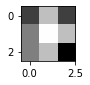

mean regions of 150 regions more=True or worst=False active for filter number: 5 :


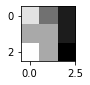

mean regions of 150 regions more=True or worst=False active for filter number: 10 :


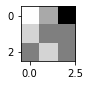

mean regions of 150 regions more=True or worst=False active for filter number: 20 :


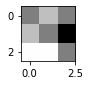

mean regions of 150 regions more=True or worst=False active for filter number: 25 :


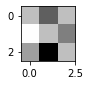

mean regions of 150 regions more=True or worst=False active for filter number: 30 :


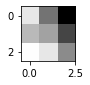

mean regions of 150 regions more=True or worst=False active for filter number: 35 :


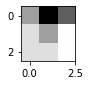

mean regions of 150 regions more=True or worst=False active for filter number: 45 :


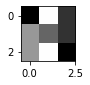

mean regions of 150 regions more=True or worst=False active for filter number: 50 :


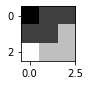

mean regions of 150 regions more=True or worst=False active for filter number: 55 :


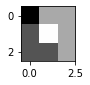

mean regions of 150 regions more=True or worst=False active for filter number: 63 :


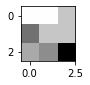

grid image
grid regions of 150 regions more=True or worst=False active for filter number: 0 :


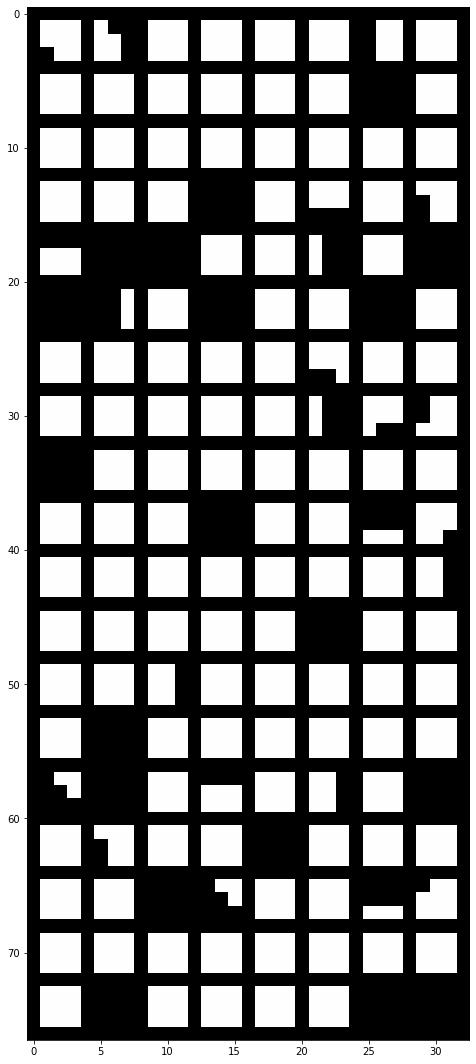

grid regions of 150 regions more=True or worst=False active for filter number: 5 :


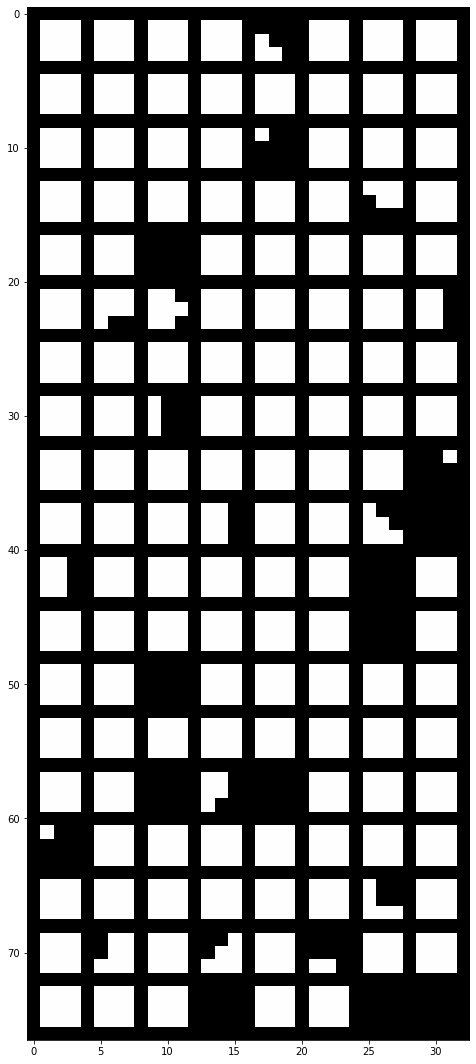

grid regions of 150 regions more=True or worst=False active for filter number: 10 :


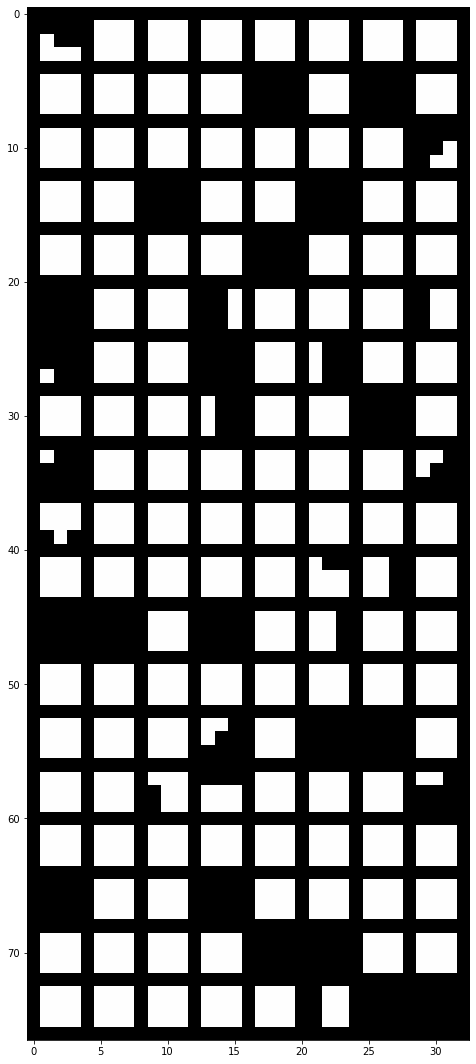

grid regions of 150 regions more=True or worst=False active for filter number: 20 :


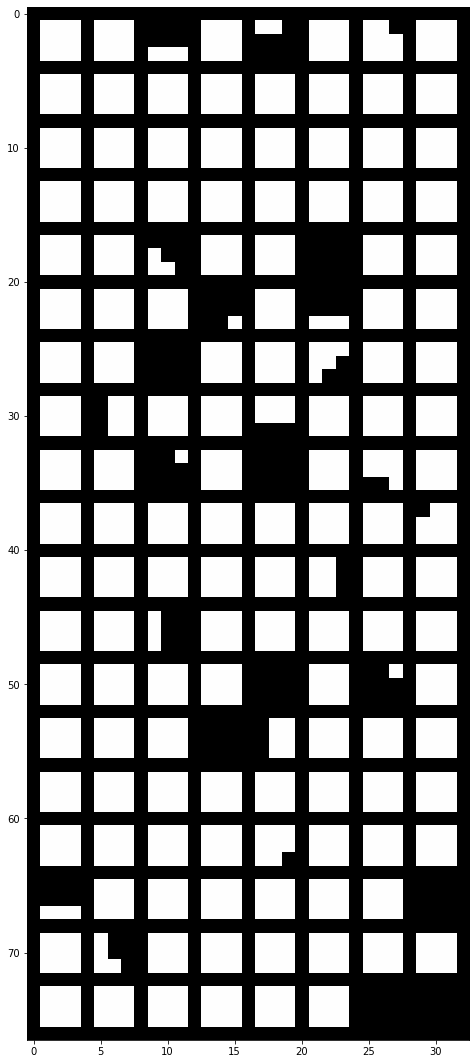

grid regions of 150 regions more=True or worst=False active for filter number: 25 :


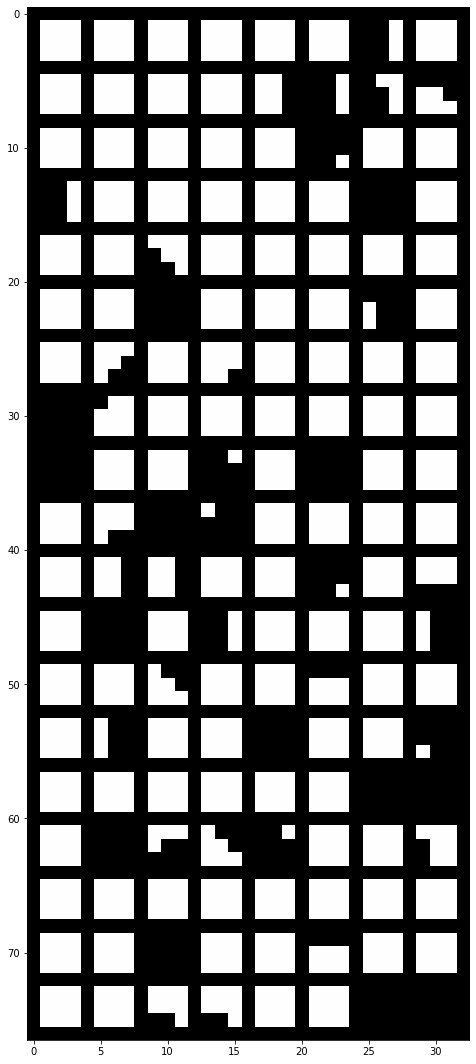

grid regions of 150 regions more=True or worst=False active for filter number: 30 :


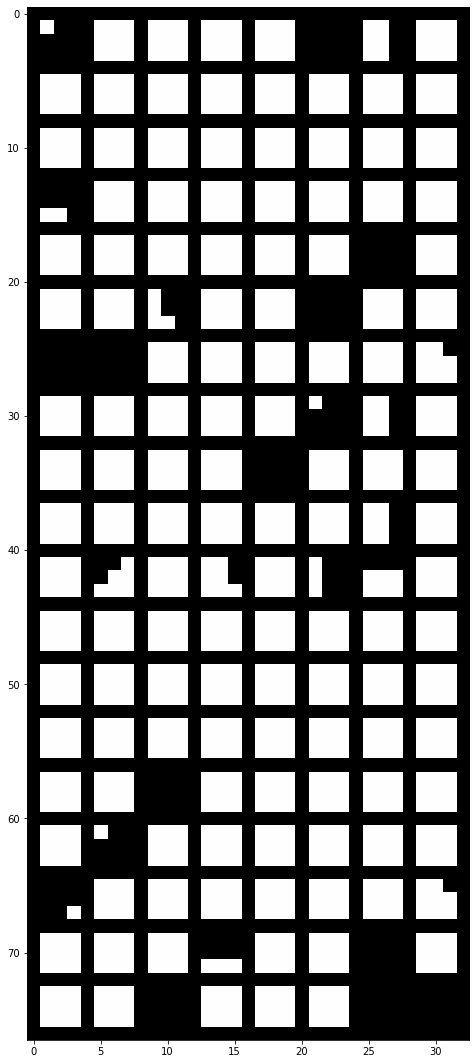

grid regions of 150 regions more=True or worst=False active for filter number: 35 :


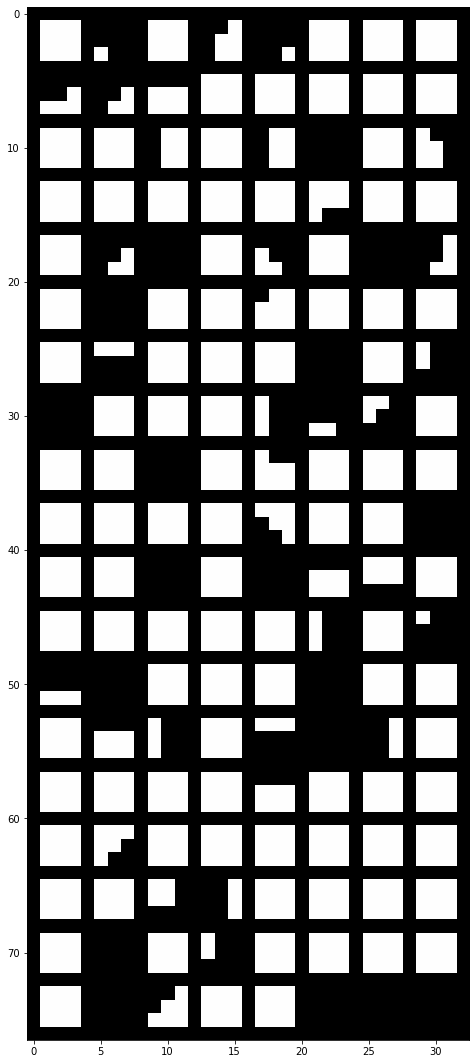

grid regions of 150 regions more=True or worst=False active for filter number: 45 :


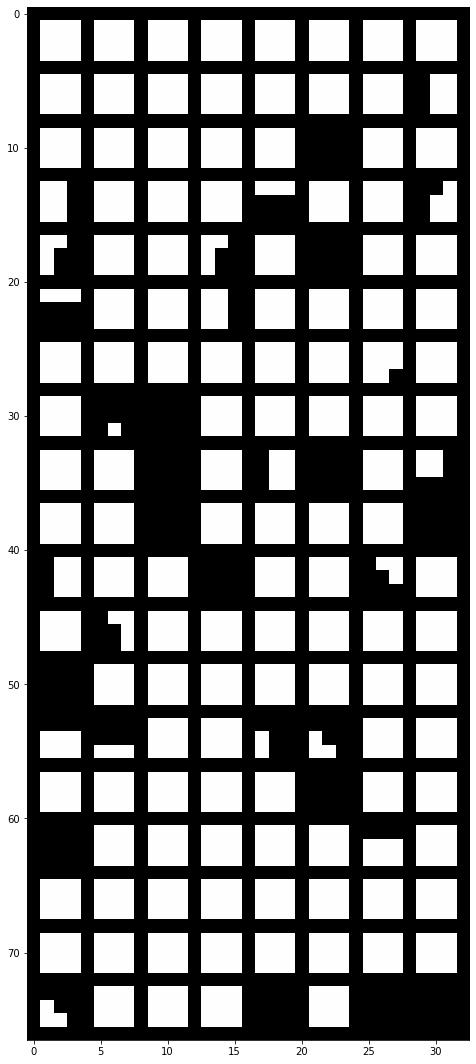

grid regions of 150 regions more=True or worst=False active for filter number: 50 :


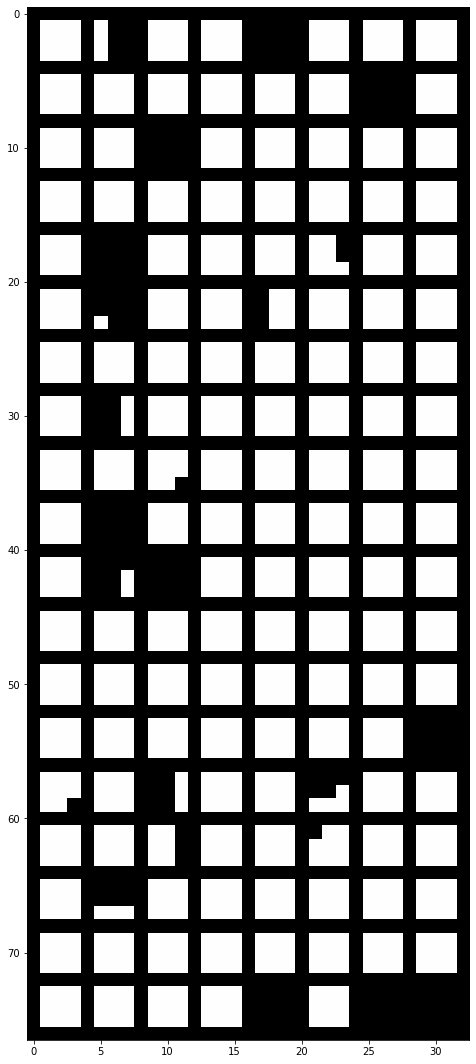

grid regions of 150 regions more=True or worst=False active for filter number: 55 :


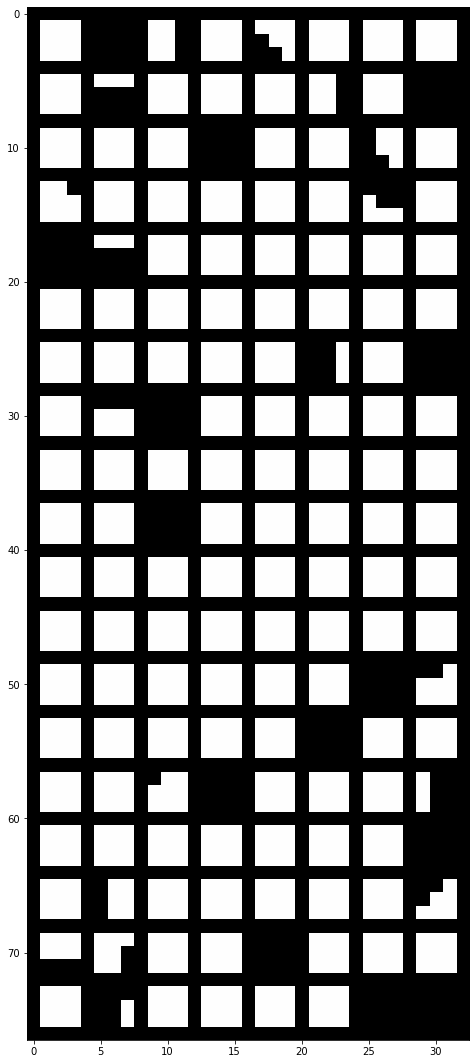

grid regions of 150 regions more=True or worst=False active for filter number: 63 :


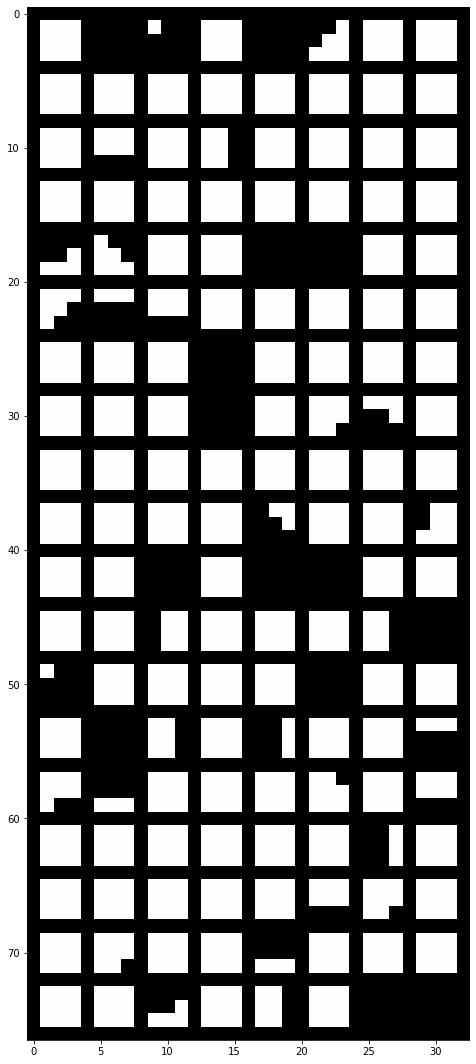

In [0]:
# parameters
list_filter_interest = [0,5,10,20,25,30,35,45,50,55,63]
best = True
worst = False
viz_mean_img = True
viz_grid = True
percentage = 5

# regions and activation of interest
regions = max_regions_Omniglot_no_binary_layer1
activations = activations_values_Omniglot_no_binary_layer1

# TODO: mean with different shape (5,5) and (5,4)
# run
selected_regions = get_regions_interest(regions, activations, best, worst, viz_mean_img, viz_grid, percentage, list_filter_interest)

Interest of filters: [0, 5, 10, 25, 30, 40, 45, 55, 60, 63]
Consider 5% image regions = 150 images
mean image:
mean regions of 150 regions more=True or worst=False active for filter number: 0 :


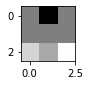

mean regions of 150 regions more=True or worst=False active for filter number: 5 :


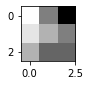

mean regions of 150 regions more=True or worst=False active for filter number: 10 :


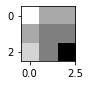

mean regions of 150 regions more=True or worst=False active for filter number: 25 :


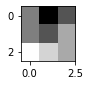

mean regions of 150 regions more=True or worst=False active for filter number: 30 :


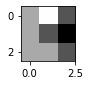

mean regions of 150 regions more=True or worst=False active for filter number: 40 :


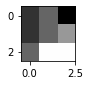

mean regions of 150 regions more=True or worst=False active for filter number: 45 :


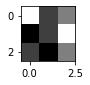

mean regions of 150 regions more=True or worst=False active for filter number: 55 :


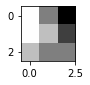

mean regions of 150 regions more=True or worst=False active for filter number: 60 :


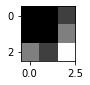

mean regions of 150 regions more=True or worst=False active for filter number: 63 :


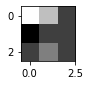

grid image
grid regions of 150 regions more=True or worst=False active for filter number: 0 :


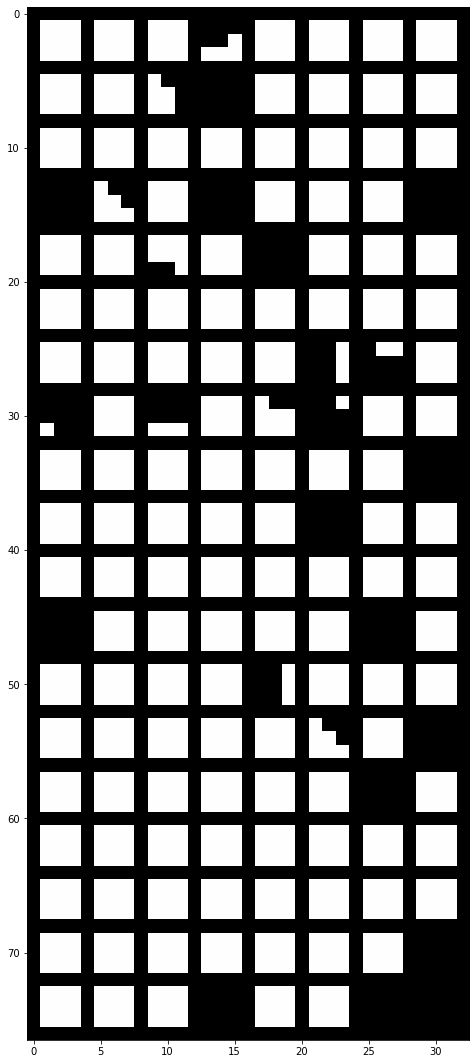

grid regions of 150 regions more=True or worst=False active for filter number: 5 :


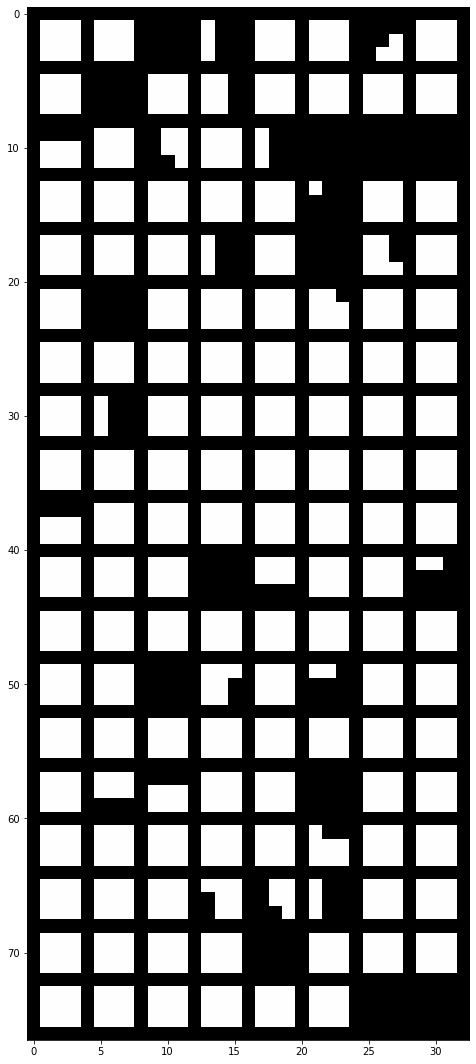

grid regions of 150 regions more=True or worst=False active for filter number: 10 :


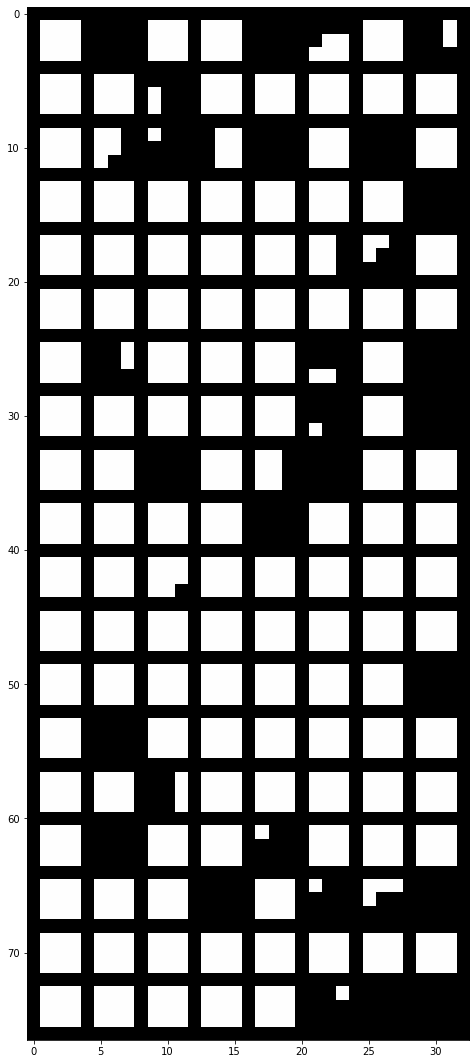

grid regions of 150 regions more=True or worst=False active for filter number: 25 :


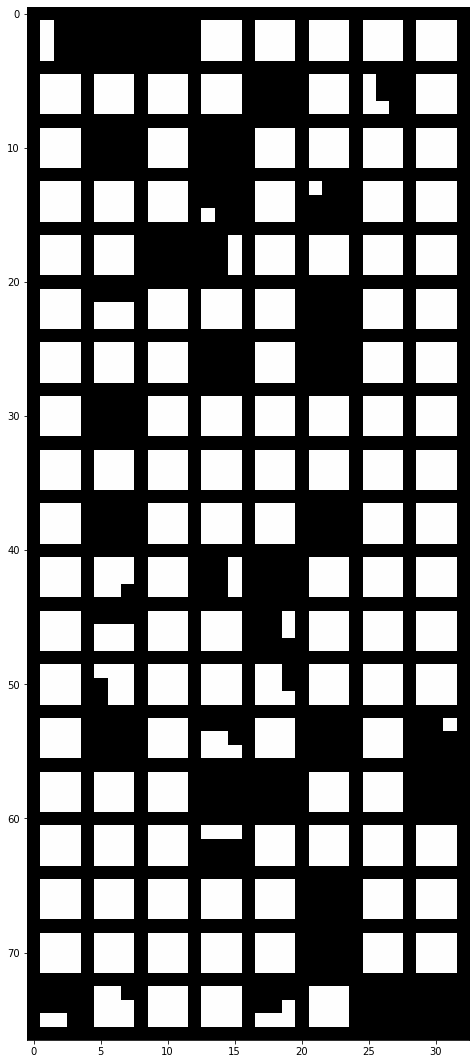

grid regions of 150 regions more=True or worst=False active for filter number: 30 :


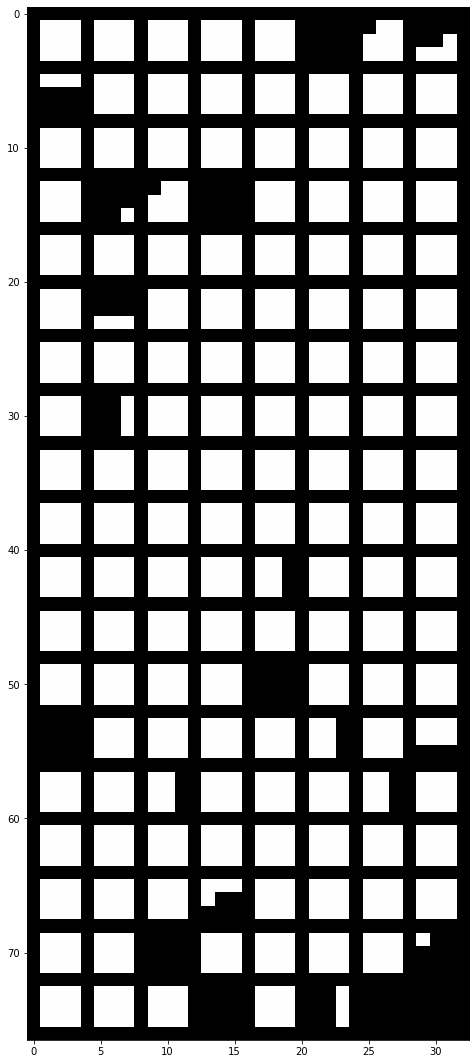

grid regions of 150 regions more=True or worst=False active for filter number: 40 :


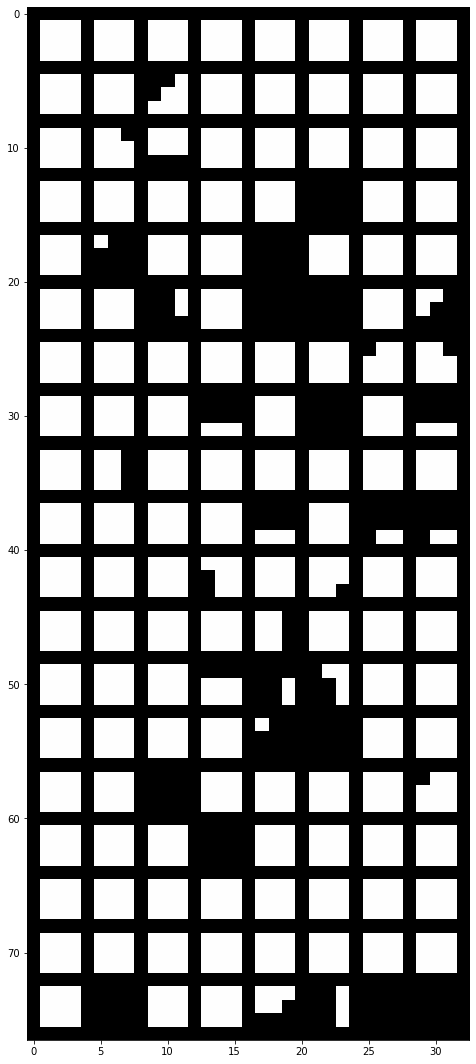

grid regions of 150 regions more=True or worst=False active for filter number: 45 :


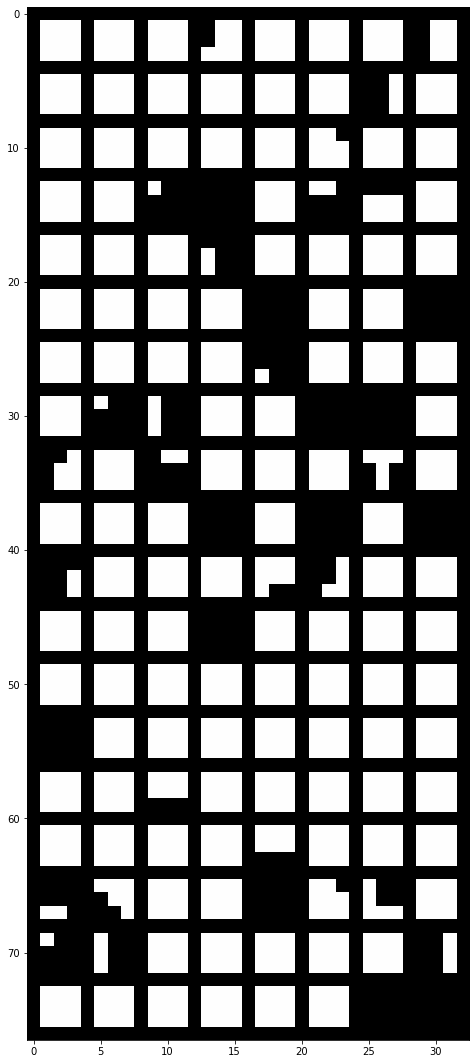

grid regions of 150 regions more=True or worst=False active for filter number: 55 :


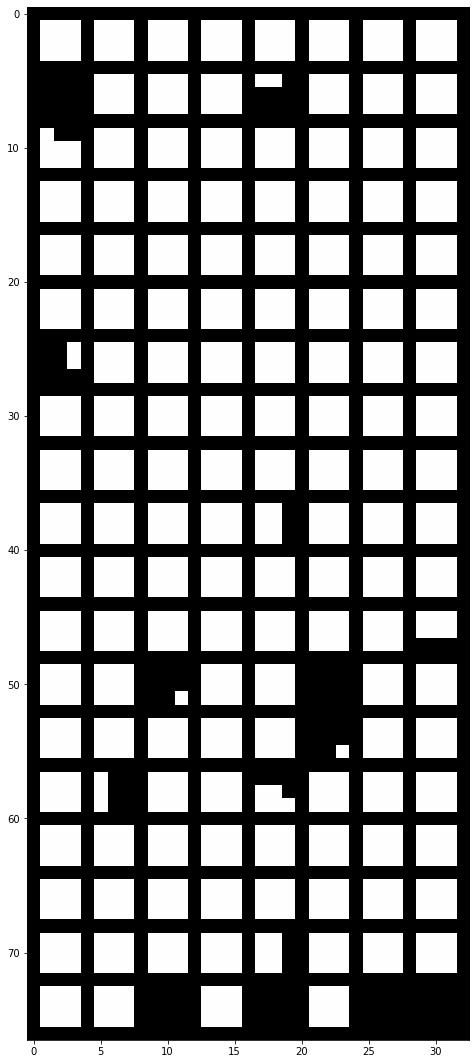

grid regions of 150 regions more=True or worst=False active for filter number: 60 :


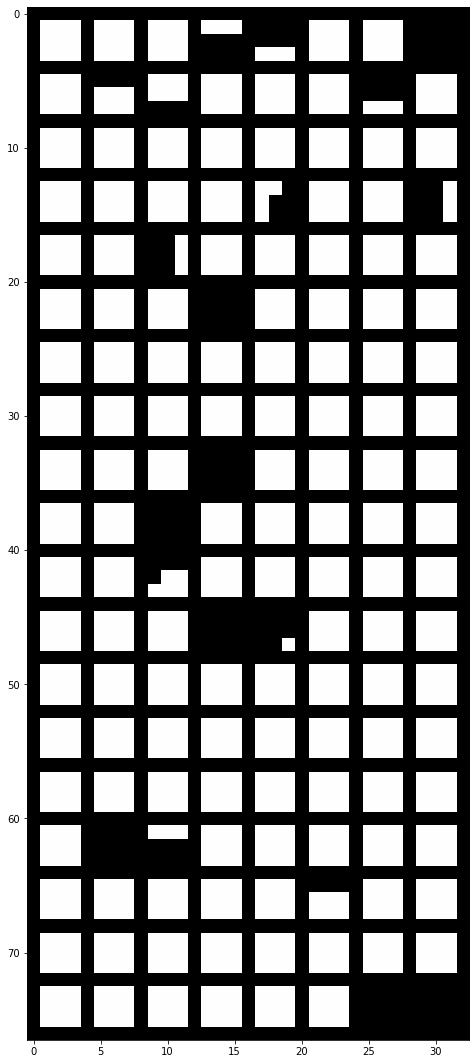

grid regions of 150 regions more=True or worst=False active for filter number: 63 :


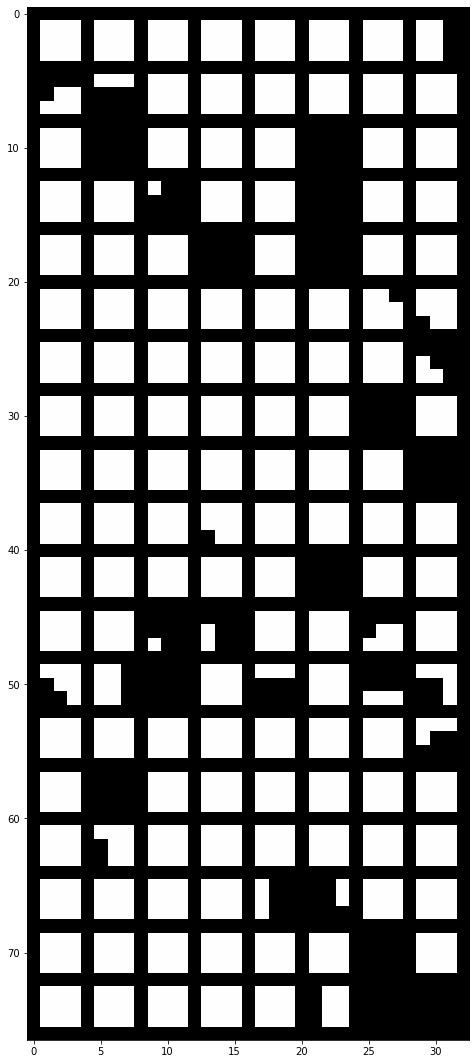

In [0]:
# parameters
list_filter_interest = [0,5,10,25,30,40,45,55,60,63]
best = True
worst = False
viz_mean_img = True
viz_grid = True
percentage = 5

# regions and activation of interest
regions = max_regions_Omniglot_binary_layer1
activations = activations_values_Omniglot_binary_layer1

# TODO: mean with different shape (5,5) and (5,4)
# run
selected_regions = get_regions_interest(regions, activations, best, worst, viz_mean_img, viz_grid, percentage, list_filter_interest)

# filter that maximize activation in a certain layer and filter:

## Modules:

In [0]:
class GradientAscent:
    """Provides an interface for activation maximization via gradient descent.
    This class implements the gradient ascent algorithm in order to perform
    activation maximization with convolutional neural networks (CNN).
    `Activation maximization <https://pdfs.semanticscholar.org/65d9/94fb778a8d9e0f632659fb33a082949a50d3.pdf>`_
    is one form of feature visualization that allows us to visualize what CNN
    filters are "looking for", by applying each filter to an input image and
    updating the input image so as to maximize the activation of the filter of
    interest (i.e. treating it as a gradient ascent task with activation as the
    loss). The implementation is inspired by `this demo <https://blog.keras.io/category/demo.html>`_
    by Francois Chollet.
    Args:
        model: A neural network model from `torchvision.models
            <https://pytorch.org/docs/stable/torchvision/models.html>`_,
            typically without the fully-connected part of the network.
            e.g. torchvisions.alexnet(pretrained=True).features
        img_size (int, optional, default=224): The size of an input image to be
            optimized.
        lr (float, optional, default=1.): The step size (or learning rate) of
            the gradient ascent.
        use_gpu (bool, optional, default=False): Use GPU if set to True and
            `torch.cuda.is_available()`.
    """

    ####################
    # Public interface #
    ####################

    def __init__(self, model, img_size=105, lr=1., use_gpu=False):
        self.model = model
        self._img_size = img_size
        self._lr = lr
        self._use_gpu = use_gpu

        self.num_layers = len(list(self.model.named_children()))
        self.activation = None
        self.gradients = None

        self.handlers = []

        self.output = None

    @property
    def lr(self):
        return self._lr

    @lr.setter
    def lr(self, lr):
        self._lr = lr

    @property
    def img_size(self):
        return self._img_size

    @img_size.setter
    def img_size(self, img_size):
        self._img_size = img_size

    @property
    def use_gpu(self):
        return self._use_gpu

    @use_gpu.setter
    def use_gpu(self, use_gpu):
        self._use_gpu = use_gpu

    def optimize(self, layer, filter_idx, input_=None, num_iter=30):
        """Generates an image that maximally activates the target filter.
        Args:
            layer (torch.nn.modules.conv.Conv2d): The target Conv2d layer from
                which the filter to be chosen, based on `filter_idx`.
            filter_idx (int): The index of the target filter.
            num_iter (int, optional, default=30): The number of iteration for
                the gradient ascent operation.
        Returns:
            output (list of torch.Tensor): With dimentions
                :math:`(num_iter, C, H, W)`. The size of the image is
                determined by `img_size` attribute which defaults to 224.
        """

        # Validate the type of the layer

        if type(layer) != nn.modules.conv.Conv2d:
            raise TypeError('The layer must be nn.modules.conv.Conv2d.')

        # Validate filter index

        num_total_filters = layer.out_channels
        self._validate_filter_idx(num_total_filters, filter_idx)

        # Inisialize input (as noise) if not provided

        if input_ is None:
            input_ = np.uint8(np.random.uniform(
                150, 180, (self._img_size, self._img_size, 1)))
            input_ = apply_transforms(input_, size=self._img_size)

        if torch.cuda.is_available() and self.use_gpu:
            self.model = self.model.to('cuda')
            input_ = input_.to('cuda')

        # Remove previous hooks if any

        while len(self.handlers) > 0:
            self.handlers.pop().remove()

        # Register hooks to record activation and gradients

        self.handlers.append(self._register_forward_hooks(layer, filter_idx))
        self.handlers.append(self._register_backward_hooks())

        # Inisialize gradients

        self.gradients = torch.zeros(input_.shape)

        # Optimize

        return self._ascent(input_, num_iter)

    def visualize(self, layer, filter_idxs=None, lr=1., num_iter=30,
                  num_subplots=4, figsize=(4, 4), title='Conv2d',
                  return_output=False):
        """Optimizes for the target layer/filter and visualizes the output.
        A method that combines optimization and visualization. There are
        mainly 3 types of operations, given a target layer:
        1. If `filter_idxs` is provided as an integer, it optimizes for the
            filter specified and plots the output.
        2. If `filter_idxs` is provided as a list of integers, it optimizes for
            all the filters specified and plots the output.
        3. if `filter_idx` is not provided, i.e. None, it randomly chooses
            `num_subplots` number of filters from the layer provided and
            plots the output.
        It also returns the output of the optimization, if specified with
        `return_output=True`.
        Args:
            layer (torch.nn.modules.conv.Conv2d): The target Conv2d layer from
                which the filter to be chosen, based on `filter_idx`.
            filter_idxs (int or list of int, optional, default=None): The index
                or indecies of the target filter(s).
            lr (float, optional, default=.1): The step size of optimization.
            num_iter (int, optional, default=30): The number of iteration for
                the gradient ascent operation.
            num_subplots (int, optional, default=4): The number of filters to
                optimize for and visualize. Relevant in case 3 above.
            figsize (tuple, optional, default=(4, 4)): The size of the plot.
                Relevant in case 1 above.
            title (str, optional default='Conv2d'): The title of the plot.
            return_output (bool, optional, default=False): Returns the
                output(s) of optimization if set to True.
        Returns:
            For a single optimization (i.e. case 1 above):
                output (list of torch.Tensor): With dimentions
                    :math:`(num_iter, C, H, W)`. The size of the image is
                    determined by `img_size` attribute which defaults to 224.
            For multiple optimization (i.e. case 2 or 3 above):
                output (list of list of torch.Tensor): With dimentions
                    :math:`(num_subplots, num_iter, C, H, W)`. The size of the
                    image is determined by `img_size` attribute which defaults
                    to 224.
        """

        self._lr = lr

        if (type(filter_idxs) == int):
            output = self._visualize_filter(layer,
                                            filter_idxs,
                                            num_iter=num_iter,
                                            figsize=figsize,
                                            title=title)
        else:
            num_total_filters = layer.out_channels

            if filter_idxs is None:
                num_subplots = min(num_total_filters, num_subplots)
                filter_idxs = np.random.choice(range(num_total_filters),
                                               size=num_subplots)

            self._visualize_filters(layer,
                                    filter_idxs,
                                    num_iter,
                                    len(filter_idxs),
                                    title=title)

        if return_output:
            return self.output

    #####################
    # Private interface #
    #####################

    def _register_forward_hooks(self, layer, filter_idx):
        def _record_activation(module, input_, output):
            self.activation = torch.mean(output[:,filter_idx,:,:])

        return layer.register_forward_hook(_record_activation)

    def _register_backward_hooks(self):
        def _record_gradients(module, grad_in, grad_out):
            if self.gradients.shape == grad_in[0].shape:
                self.gradients = grad_in[0]

        for _, module in self.model.named_modules():
            if isinstance(module, nn.modules.conv.Conv2d) and \
                    module.in_channels == 1:
                return module.register_backward_hook(_record_gradients)

    def _ascent(self, x, num_iter):
        output = []

        for i in range(num_iter):
            self.model(x)

            self.activation.backward()

            self.gradients /= (torch.sqrt(torch.mean(
                torch.mul(self.gradients, self.gradients))) + 1e-5)

            x = x + self.gradients * self._lr
            output.append(x)

        return output

    def _validate_filter_idx(self, num_filters, filter_idx):
        if not np.issubdtype(type(filter_idx), np.integer):
            raise TypeError('Indecies must be integers.')
        elif (filter_idx < 0) or (filter_idx > num_filters):
            raise ValueError(f'Filter index must be between 0 and {num_filters - 1}.')

    def _visualize_filter(self, layer, filter_idx, num_iter, figsize, title):
        self.output = self.optimize(layer, filter_idx, num_iter=num_iter)

        plt.figure(figsize=figsize)
        plt.axis('off')
        plt.title(title)
        
        plt.imshow(format_for_plotting(
            standardize_and_clip(self.output[-1],
                                 saturation=0.15,
                                 brightness=0.7)), cmap='gray');
        
        # plt.imshow(self.output[-1])

    def _visualize_filters(self, layer, filter_idxs, num_iter, num_subplots,
                           title):
        # Prepare the main plot

        num_cols = 4
        num_rows = int(np.ceil(num_subplots / num_cols))

        fig = plt.figure(figsize=(16, num_rows * 5))
        plt.title(title)
        plt.axis('off')

        self.output = []

        # Plot subplots

        for i, filter_idx in enumerate(filter_idxs):
            output = self.optimize(layer, filter_idx, num_iter=num_iter)

            self.output.append(output)

            ax = fig.add_subplot(num_rows, num_cols, i+1)
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_title(f'filter {filter_idx}')

            
            ax.imshow(format_for_plotting(
                standardize_and_clip(output[-1],
                                     saturation=0.15,
                                     brightness=0.7)), cmap='gray')
            
            # ax.imshow(self.output[-1])
            
        plt.subplots_adjust(wspace=0, hspace=0);

In [0]:
def apply_transforms(image, size=105):
    """Transforms a PIL image to torch.Tensor.
    Applies a series of tranformations on PIL image including a conversion
    to a tensor. The returned tensor has a shape of :math:`(N, C, H, W)` and
    is ready to be used as an input to neural networks.
    First the image is resized to 256, then cropped to 224. The `means` and
    `stds` for normalisation are taken from numbers used in ImageNet, as
    currently developing the package for visualizing pre-trained models.
    The plan is to to expand this to handle custom size/mean/std.
    Args:
        image (PIL.Image.Image or numpy array)
        size (int, optional, default=224): Desired size (width/height) of the
            output tensor
    Shape:
        Input: :math:`(C, H, W)` for numpy array
        Output: :math:`(N, C, H, W)`
    Returns:
        torch.Tensor (torch.float32): Transformed image tensor
    Note:
        Symbols used to describe dimensions:
            - N: number of images in a batch
            - C: number of channels
            - H: height of the image
            - W: width of the image
    """

    if not isinstance(image, Image.Image):
        image = F.to_pil_image(image)

    # means = [0.485, 0.456, 0.406]
    # stds = [0.229, 0.224, 0.225]
    # to only one channel
    means = [0.406]
    stds = [0.225]

    transform = transforms.Compose([
        transforms.Resize(size),
        transforms.CenterCrop(size),
        transforms.ToTensor(),
        transforms.Normalize(means, stds)
    ])

    tensor = transform(image).unsqueeze(0)

    tensor.requires_grad = True

    return tensor

In [0]:
def format_for_plotting(tensor):
    """Formats the shape of tensor for plotting.
    Tensors typically have a shape of :math:`(N, C, H, W)` or :math:`(C, H, W)`
    which is not suitable for plotting as images. This function formats an
    input tensor :math:`(H, W, C)` for RGB and :math:`(H, W)` for mono-channel
    data.
    Args:
        tensor (torch.Tensor, torch.float32): Image tensor
    Shape:
        Input: :math:`(N, C, H, W)` or :math:`(C, H, W)`
        Output: :math:`(H, W, C)` or :math:`(H, W)`, respectively
    Return:
        torch.Tensor (torch.float32): Formatted image tensor (detached)
    Note:
        Symbols used to describe dimensions:
            - N: number of images in a batch
            - C: number of channels
            - H: height of the image
            - W: width of the image
    """

    has_batch_dimension = len(tensor.shape) == 4
    formatted = tensor.clone()

    if has_batch_dimension:
        formatted = tensor.squeeze(0)

    if formatted.shape[0] == 1:
        return formatted.squeeze(0).detach()
    else:
        return formatted.permute(1, 2, 0).detach()

In [0]:
def standardize_and_clip(tensor, min_value=0.0, max_value=1.0,
                         saturation=0.1, brightness=0.5):

    """Standardizes and clips input tensor.
    Standardizes the input tensor (mean = 0.0, std = 1.0). The color saturation
    and brightness are adjusted, before tensor values are clipped to min/max
    (default: 0.0/1.0).
    Args:
        tensor (torch.Tensor):
        min_value (float, optional, default=0.0)
        max_value (float, optional, default=1.0)
        saturation (float, optional, default=0.1)
        brightness (float, optional, default=0.5)
    Shape:
        Input: :math:`(C, H, W)`
        Output: Same as the input
    Return:
        torch.Tensor (torch.float32): Normalised tensor with values between
            [min_value, max_value]
    """

    tensor = tensor.detach().cpu()

    mean = tensor.mean()
    std = tensor.std()

    if std == 0:
        std += 1e-7

    standardized = tensor.sub(mean).div(std).mul(saturation)
    clipped = standardized.add(brightness).clamp(min_value, max_value)

    return clipped


## No binary:

In [0]:
model, name_model = no_binary_model()
print(name_model)

use 1 gpu who named: Tesla P100-PCIE-16GB
Omniglot_classif_NonBinaryNet


In [0]:
g_ascent = GradientAscent(model)
g_ascent.use_gpu = True

In [0]:
conv1 = model.layer1
conv1_filters = [0,8,16,20,24,28,32,40,45,48,56,63]

conv2 = model.layer2
conv2_filters = [0,8,16,20,24,28,32,40,45,48,56,63]

conv3 = model.layer3
conv3_filters = [0,8,16,20,24,28,32,40,45,48,56,63]

conv4 = model.layer4
conv4_filters = [0,8,16,20,24,28,32,40,45,48,56,63]

In [0]:
g_ascent.visualize(conv1, conv1_filters, title='conv1');
g_ascent.visualize(conv2, conv2_filters, title='conv2');
g_ascent.visualize(conv3, conv3_filters, title='conv3');
g_ascent.visualize(conv4, conv4_filters, title='conv4');

Output hidden; open in https://colab.research.google.com to view.

## Binary:

In [0]:
model, name_model = binary_model_first()
print(name_model)

use 1 gpu who named: Tesla P100-PCIE-16GB
Omniglot_classif_Stochastic_ST_first_conv_binary


In [0]:
g_ascent = GradientAscent(model)
g_ascent.use_gpu = True

In [0]:
conv1 = model.layer1
conv1_filters = [0,8,16,20,24,28,32,40,45,48,56,63]

conv2 = model.layer2
conv2_filters = [0,8,16,20,24,28,32,40,45,48,56,63]

conv3 = model.layer3
conv3_filters = [0,8,16,20,24,28,32,40,45,48,56,63]

conv4 = model.layer4
conv4_filters = [0,8,16,20,24,28,32,40,45,48,56,63]

In [0]:
g_ascent.visualize(conv1, conv1_filters, title='conv1');
g_ascent.visualize(conv2, conv2_filters, title='conv2');
g_ascent.visualize(conv3, conv3_filters, title='conv3');
g_ascent.visualize(conv4, conv4_filters, title='conv4');

Output hidden; open in https://colab.research.google.com to view.